In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
# Data load
data = pd.read_csv('./data/boston.csv')
data_tr = pd.read_csv('./data/boston_transform.csv', index_col = 'original_idx')
data_missing = pd.read_csv('./data/boston_nan.csv', index_col = 'original_idx')

#  각 변수별 분포 확인

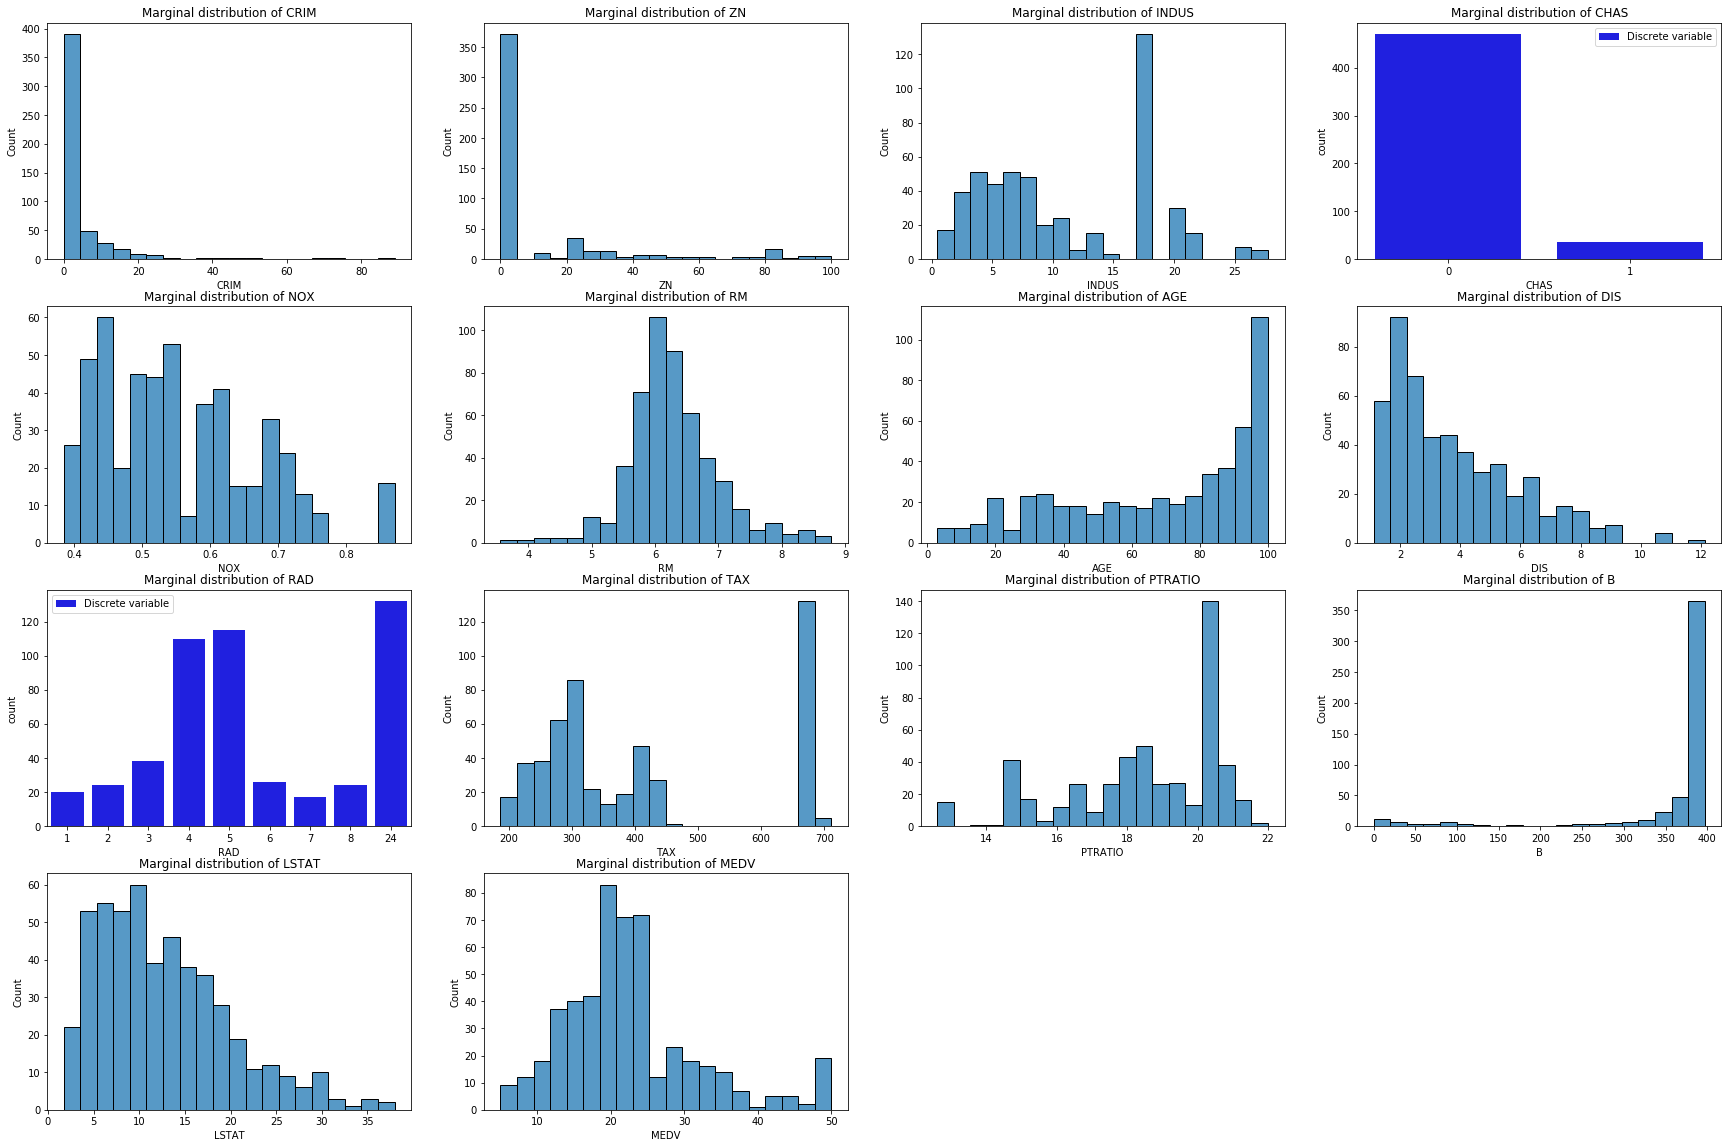

In [11]:
bins = 20

discrete_covariate = ['CHAS', 'RAD']

plt.figure(figsize=(30,20))
for i, cov in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)
    if cov in discrete_covariate :
        sns.countplot(data[cov], color = 'b')
        plt.legend(['Discrete variable'])
    else :
        sns.histplot(data[cov], bins=bins, discrete = False)
    plt.title("Marginal distribution of " + cov)
    
plt.show()

# Data tranformation 결과

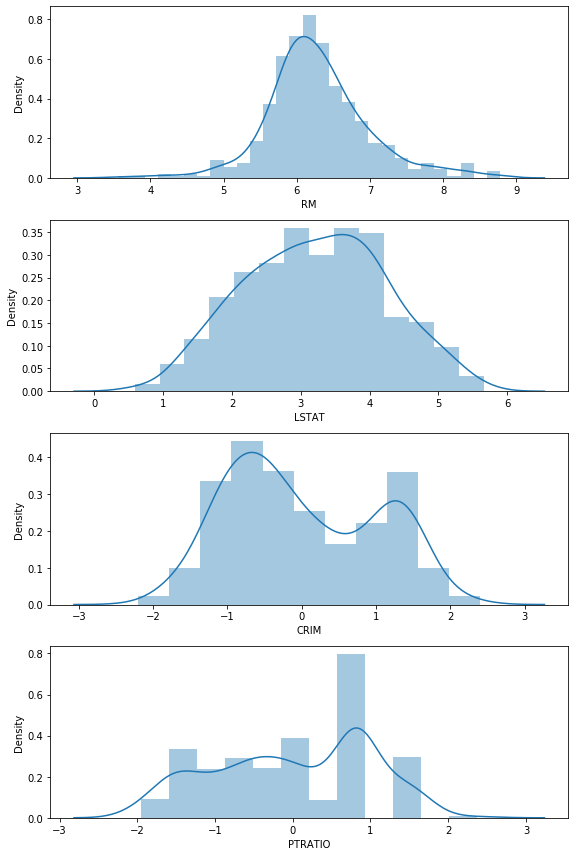

In [5]:
fig, ax = plt.subplots(4, figsize =(8, 12))
sns.distplot(data_tr['RM'], ax = ax[0])
sns.distplot(data_tr['LSTAT'], ax = ax[1])
sns.distplot(data_tr['CRIM'], ax = ax[2])
sns.distplot(data_tr['PTRATIO'], ax = ax[3])
fig.tight_layout()
plt.show()

# Missing Pattern 확인
### Monotone pattern

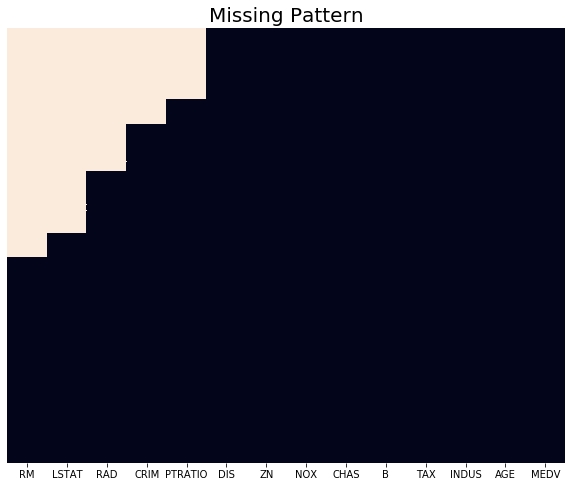

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_missing.isnull(), cbar = False)
plt.yticks([])
plt.ylabel("")
plt.title("Missing Pattern", fontsize = 20)
plt.show()

### 결측 비율 확인

In [7]:
print("RM \t 의 결측 비율 : %.2f %%" % ((data_missing['RM'].isnull()).mean()*100))
print("LSTAT\t 의 결측 비율 : %.2f %% " % ((data_missing['LSTAT'].isnull()).mean()*100))
print("RAD\t 의 결측 비율 : %.2f %%" % ((data_missing['RAD'].isnull()).mean()*100))
print("CRIM\t 의 결측 비율 : %.2f %%" % ((data_missing['CRIM'].isnull()).mean()*100))
print("PTRATIO\t 의 결측 비율 : %.2f %%" % ((data_missing['PTRATIO'].isnull()).mean()*100))

RM 	 의 결측 비율 : 52.77 %
LSTAT	 의 결측 비율 : 47.23 % 
RAD	 의 결측 비율 : 33.00 %
CRIM	 의 결측 비율 : 22.13 %
PTRATIO	 의 결측 비율 : 16.40 %


# MAR 확인

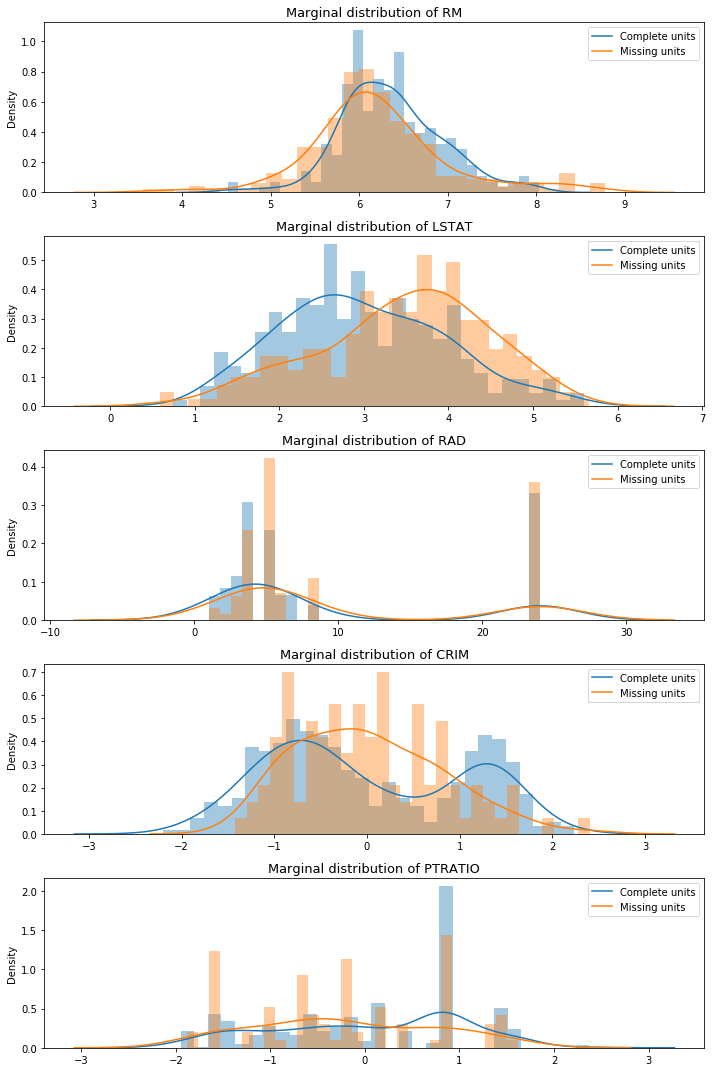

In [8]:
bins = 30
missing_cov = ['RM', 'LSTAT', 'RAD', 'CRIM', 'PTRATIO']
complete_data = data_tr[data_missing.isnull()]
fig, ax = plt.subplots(5, figsize=(10,15))

for i, cov in enumerate(missing_cov):
    sns.distplot(data_missing[cov], bins=bins, hist=True, ax= ax[i])
    sns.distplot(complete_data[cov], bins=bins, hist=True, ax= ax[i])
    ax[i].legend(['Complete units', 'Missing units'], loc="upper right", fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_title("Marginal distribution of "+ cov, fontsize=13)

fig.tight_layout()
plt.show()